<a href="https://colab.research.google.com/github/MukunthanPeriyasamy/Deep_Learning_Projects/blob/main/Childern_vs_Adult_Image_Classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Input
from tensorflow.keras.models import Sequential
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mimg

In [37]:
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
import zipfile

files = zipfile.ZipFile('/content/Children vs Adult dataset.zip')
files.extractall()

# View Random Image function

In [ ]:
train_dir_image = 'train/'

def view_random_image(image_category):
  image_path = train_dir_image + image_category

  list_image = os.listdir(image_path)
  random_image = random.choice(list_image)

  image_path_join = os.path.join(image_path,random_image)

  img = mimg.imread(image_path_join)
  plt.imshow(img)
  plt.axis('off')


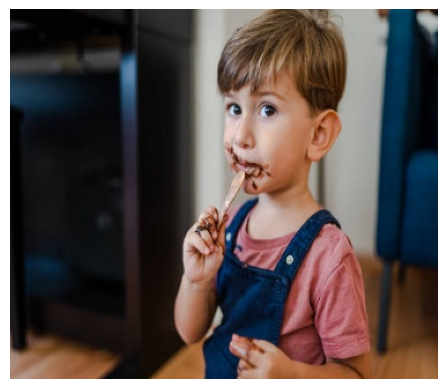

In [75]:
view_random_image('children')

# Function for visualizing the loss curve of the model

In [ ]:
def view_loss_curve(model_history):

  loss = model_history.history['loss']
  val_loss = model_history.history['val_loss']

  accuracy = model_history.history['accuracy']
  val_accuracy = model_history.history['val_accuracy']

  plt.plot(range(len(loss)),loss,label = 'loss')
  plt.plot(range(len(loss)),val_loss,label = 'val_loss')
  plt.title('Loss')
  plt.legend(loc='upper right')

  plt.figure()
  plt.plot(range(len(accuracy)),accuracy,label='accuracy')
  plt.plot(range(len(accuracy)),val_accuracy,label='val_accuracy')
  plt.title('Accuracy')
  plt.legend(loc='lower right')

# Image Data Processing

In [38]:
train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255)

In [39]:
train_dir = 'train/'
test_dir = 'test/'

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 680 images belonging to 2 classes.
Found 120 images belonging to 2 classes.


# Training the Model (Model Building)

In [118]:
model_1 = Sequential([
    Input(shape=(224,224,3)),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(2,activation='softmax')
])

model_1.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_1 = model_1.fit(
    train_data,
    validation_data = test_data,
    epochs = 10
)

Epoch 1/10
22/22 [==============================] - 16s 700ms/step - loss: 0.6990 - accuracy: 0.4971 - val_loss: 0.6951 - val_accuracy: 0.4833
Epoch 2/10
22/22 [==============================] - 15s 682ms/step - loss: 0.6905 - accuracy: 0.5426 - val_loss: 0.6965 - val_accuracy: 0.5167
Epoch 3/10
22/22 [==============================] - 14s 657ms/step - loss: 0.6822 - accuracy: 0.5647 - val_loss: 0.6916 - val_accuracy: 0.5167
Epoch 4/10
22/22 [==============================] - 14s 657ms/step - loss: 0.6825 - accuracy: 0.5971 - val_loss: 0.6933 - val_accuracy: 0.5083
Epoch 5/10
22/22 [==============================] - 14s 652ms/step - loss: 0.6687 - accuracy: 0.6162 - val_loss: 0.6977 - val_accuracy: 0.5167
Epoch 6/10
22/22 [==============================] - 14s 657ms/step - loss: 0.6585 - accuracy: 0.6029 - val_loss: 0.6904 - val_accuracy: 0.5167
Epoch 7/10
22/22 [==============================] - 14s 647ms/step - loss: 0.6331 - accuracy: 0.6368 - val_loss: 0.7024 - val_accuracy: 0.6083

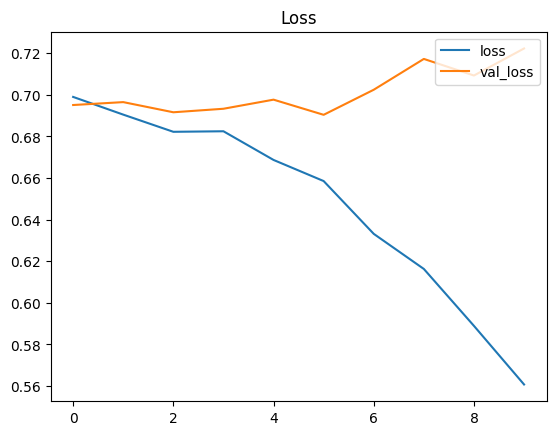

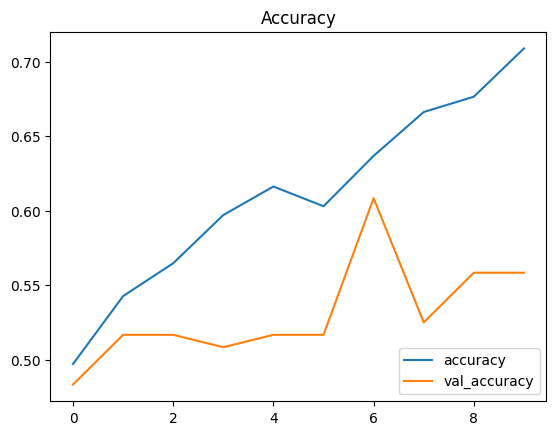

In [119]:
view_loss_curve(history_1)

In [169]:
## Image agumentation for tarining data

train_data_agumentation = ImageDataGenerator(
    rescale = 1/255,
    zoom_range = 0.2,
    horizontal_flip = True,
)

train_data_agumented = train_data_agumentation.flow_from_directory(
    train_dir,
    target_size = (224,224),
    class_mode = 'categorical',
    batch_size = 32
)

Found 680 images belonging to 2 classes.


In [170]:
model_2 = Sequential([
    Input(shape=(224,224,3)),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Conv2D(10,3,activation='relu'),
    MaxPool2D(),

    Flatten(),
    Dense(2,activation='softmax')
])

model_2.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

history_2= model_2.fit(
    train_data_agumented,
    validation_data = test_data,
    epochs = 10
)

Epoch 1/10
22/22 [==============================] - 21s 928ms/step - loss: 0.6956 - accuracy: 0.5029 - val_loss: 0.6871 - val_accuracy: 0.5417
Epoch 2/10
22/22 [==============================] - 19s 857ms/step - loss: 0.6874 - accuracy: 0.5515 - val_loss: 0.6895 - val_accuracy: 0.5083
Epoch 3/10
22/22 [==============================] - 18s 834ms/step - loss: 0.6809 - accuracy: 0.5412 - val_loss: 0.6808 - val_accuracy: 0.5500
Epoch 4/10
22/22 [==============================] - 18s 819ms/step - loss: 0.6651 - accuracy: 0.5779 - val_loss: 0.6617 - val_accuracy: 0.5667
Epoch 5/10
22/22 [==============================] - 18s 824ms/step - loss: 0.6555 - accuracy: 0.5985 - val_loss: 0.6802 - val_accuracy: 0.5333
Epoch 6/10
22/22 [==============================] - 18s 819ms/step - loss: 0.6462 - accuracy: 0.5971 - val_loss: 0.6561 - val_accuracy: 0.5750
Epoch 7/10
22/22 [==============================] - 18s 814ms/step - loss: 0.6533 - accuracy: 0.5941 - val_loss: 0.6169 - val_accuracy: 0.6000

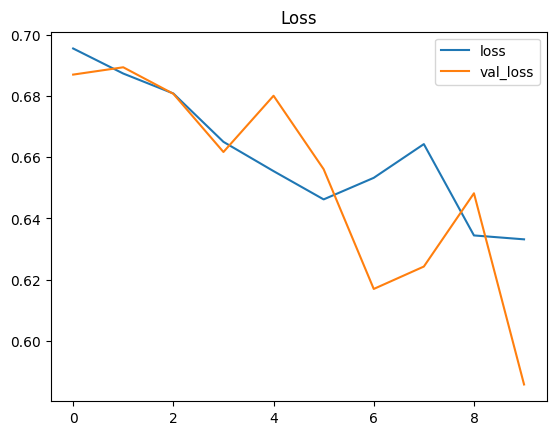

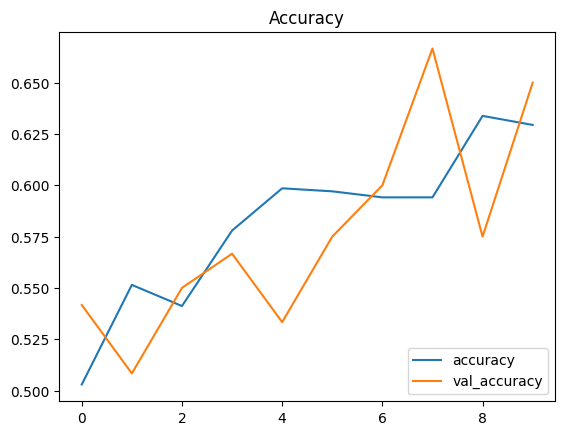

In [171]:
view_loss_curve(history_2)

In [172]:
model_2.evaluate(test_data)

4/4 [==============================] - 1s 169ms/step - loss: 0.5857 - accuracy: 0.6500


[0.5856513977050781, 0.6499999761581421]

In [120]:
model_1.evaluate(test_data)

4/4 [==============================] - 1s 199ms/step - loss: 0.7223 - accuracy: 0.5583


[0.7222834825515747, 0.5583333373069763]

# Model Prediction

In [173]:
import numpy as np

def prediction(image):
  img = image / 255

  resize_image = tf.image.resize(img,(224,224))
  image_pred = tf.expand_dims(resize_image,axis=0)
  pred = model_2.predict(image_pred)
  list_value = os.listdir('train/')
  list_value = sorted(list_value)
  output = np.argmax(pred)
  print(pred)
  print(list_value[output])

(-0.5, 1191.5, 1703.5, -0.5)

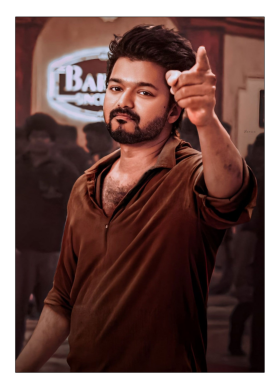

In [185]:
image = '/content/thalapathy.jpg'
image = mimg.imread(image)
plt.imshow(image)
plt.axis('off')

In [186]:
prediction(image)

1/1 [==============================] - 0s 28ms/step
[[0.74294245 0.2570575 ]]
adults


🔑 **Note:** In our case **model_2** performance is better than **model_1**. So we are going to stick with **model_2**